In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
import numpy as np


In [ ]:
df=pd.read_csv('Data/IceCreamData.csv')
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/DSAI/Supervised Learning/Data/IceCreamData.csv')

In [ ]:
df.info

<bound method DataFrame.info of      Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]>

In [ ]:
df.shape

(500, 2)

In [ ]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea3deab9450>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea3deab9990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea3deab91b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ea3deab9ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ea3deaba170>,
 'means': []}

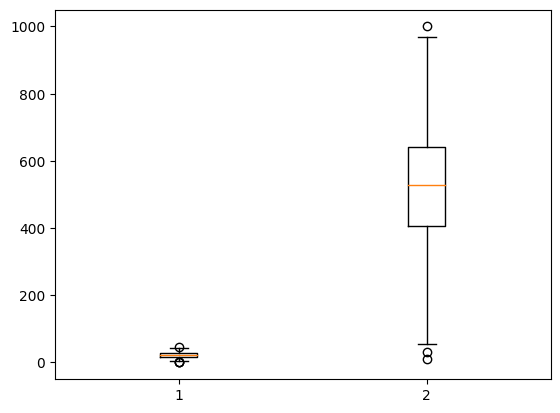

In [ ]:
plt.boxplot(df)


<Axes: ylabel='Temperature'>

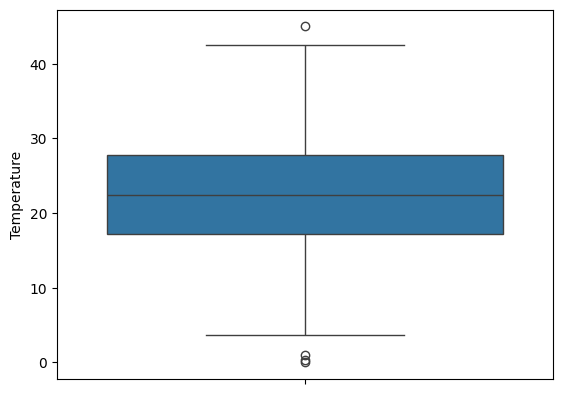

In [ ]:
sns.boxplot(df['Temperature'])

<Axes: ylabel='Revenue'>

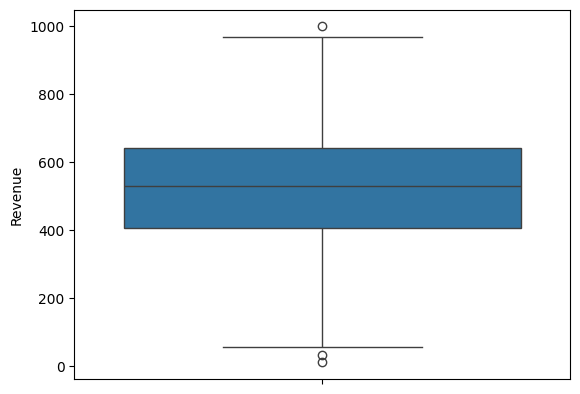

In [ ]:
sns.boxplot(df['Revenue'])

Text(0, 0.5, 'Revenue')

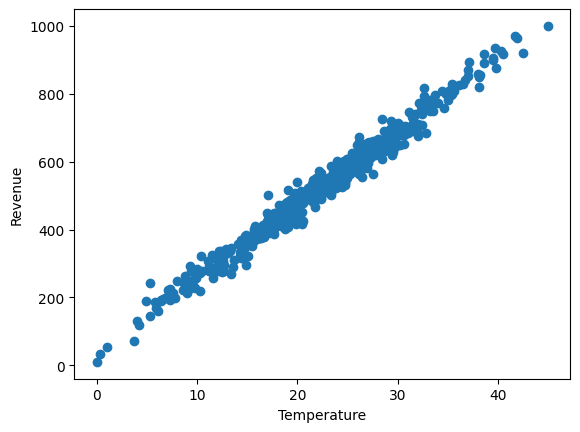

In [ ]:
plt.scatter(df['Temperature'],df['Revenue'])
plt.xlabel('Temperature')
plt.ylabel('Revenue')

In [ ]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


In [ ]:
df['xi-xbar']=df['Temperature']-df['Temperature'].mean()
df['yi-ybar']=df['Revenue']-df['Revenue'].mean()

In [ ]:
df

,Temperature,Revenue,xi-xbar,yi-ybar
0,24.566884,534.799028,2.334659,13.228252
1,26.005191,625.190122,3.772966,103.619345
2,27.790554,660.632289,5.558329,139.061512
3,20.595335,487.706960,-1.636890,-33.863816
4,11.503498,316.240194,-10.728727,-205.330582
...,...,...,...,...
495,22.274899,524.746364,0.042674,3.175588
496,32.893092,755.818399,10.660867,234.247622
497,12.588157,306.090719,-9.644068,-215.480058
498,22.362402,566.217304,0.130177,44.646527


In [ ]:
df['AxB']=df['xi-xbar']*df['yi-ybar']
df['xi-xbar sq']=np.square(df['xi-xbar'])

In [ ]:
df

,Temperature,Revenue,xi-xbar,yi-ybar,AxB,xi-xbar sq
0,24.566884,534.799028,2.334659,13.228252,30.883461,5.450634
1,26.005191,625.190122,3.772966,103.619345,390.952269,14.235273
2,27.790554,660.632289,5.558329,139.061512,772.949603,30.895019
3,20.595335,487.706960,-1.636890,-33.863816,55.431345,2.679409
4,11.503498,316.240194,-10.728727,-205.330582,2202.935859,115.105593
...,...,...,...,...,...,...
495,22.274899,524.746364,0.042674,3.175588,0.135515,0.001821
496,32.893092,755.818399,10.660867,234.247622,2497.282743,113.654085
497,12.588157,306.090719,-9.644068,-215.480058,2078.104365,93.008051
498,22.362402,566.217304,0.130177,44.646527,5.811962,0.016946


In [ ]:
m=df['AxB'].sum()/df['xi-xbar sq'].sum()
m

21.44362551068026

In [ ]:
b=df['Revenue'].mean()-m*df['Temperature'].mean()

In [ ]:
b

44.831267090563585

<Axes: xlabel='Temperature', ylabel='Revenue'>

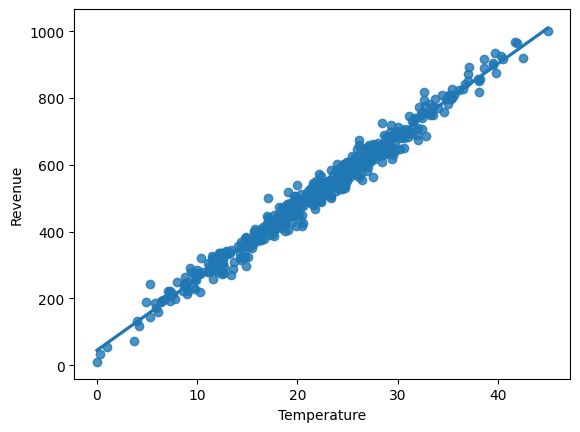

In [ ]:
sns.regplot(x="Temperature",y='Revenue',data=df)

In [ ]:
df['y_pred']=m*df['Temperature']+b


In [ ]:
df

,Temperature,Revenue,xi-xbar,yi-ybar,AxB,xi-xbar sq,y_pred
0,24.566884,534.799028,2.334659,13.228252,30.883461,5.450634,571.634337
1,26.005191,625.190122,3.772966,103.619345,390.952269,14.235273,602.476847
2,27.790554,660.632289,5.558329,139.061512,772.949603,30.895019,640.761497
3,20.595335,487.706960,-1.636890,-33.863816,55.431345,2.679409,486.469919
4,11.503498,316.240194,-10.728727,-205.330582,2202.935859,115.105593,291.507963
...,...,...,...,...,...,...,...
495,22.274899,524.746364,0.042674,3.175588,0.135515,0.001821,522.485865
496,32.893092,755.818399,10.660867,234.247622,2497.282743,113.654085,750.178416
497,12.588157,306.090719,-9.644068,-215.480058,2078.104365,93.008051,314.766991
498,22.362402,566.217304,0.130177,44.646527,5.811962,0.016946,524.362249


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(df['Temperature'],df['y_pred'])
mae=mean_absolute_error(df['Temperature'],df['y_pred'])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df2=pd.read_csv('Data/IceCreamData.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Data/IceCreamData.csv'

In [ ]:
df2 =pd.read_csv('/content/drive/MyDrive/DSAI/Supervised Learning/Data/IceCreamData.csv')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df2.drop('Revenue',axis=1),df2['Revenue'],
                                               test_size=0.3,
                                               random_state=5)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
mse= mean_squared_error(y_test,y_pred)
mse

737.4036485489237

In [ ]:
mean_absolute_error(y_test,y_pred)

21.55920523324946

In [ ]:
plt.scatter(df['Temperature'], df['Revenue'], color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Gradient Descent

500

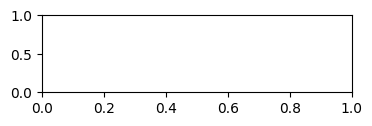

In [ ]:
m=0
b=0
LR=0.001
df.shape[0]

In [ ]:
x=df['Temperature']
y=df['Revenue']

In [ ]:
def GD(x, y, m, b, LR):
    dldb = -2 / len(x) * (y - (m * x + b)).sum()   # b0
    dldm = -2 / len(x) * ((y - (m * x + b))*x).sum()   #b1
    b = b - LR * dldb
    m = m - LR * dldm  # 0 - (0.001*dldm)
    return m,b

In [ ]:
print(GD(x,y,m,b,LR))


(25.99705845028181, 1.0431415533830801)


In [ ]:
GrdDsc=[]
for i in range(1000):
    m,b=GD(x, y, m, b, LR)
    yhat = m*x+b
    loss=mean_absolute_error(y,yhat)
    #loss = np.divide(np.sum((y-yhat)**2,axis=0),x.shape[0])
    GrdDsc.append({'Iteration': i, 'm': m, 'b': b, 'Loss': loss})
GrdDsc_df=pd.DataFrame(GrdDsc)
GrdDsc_df

,Iteration,m,b,Loss
0,0,25.997058,1.043142,62.015447
1,1,22.847031,0.928252,23.944254
2,2,23.228204,0.953656,22.958727
3,3,23.181568,0.962061,22.928419
4,4,23.186762,0.972523,22.928026
...,...,...,...,...
995,995,22.826284,10.030343,21.720751
996,996,22.825962,10.038466,21.719788
997,997,22.825639,10.046587,21.718825
998,998,22.825316,10.054706,21.717863


In [ ]:
#mse= mean_squared_error(y_test,yhat)